# Clustering Jerárquico - Hierarchical Clustering

In [22]:
import numpy as np #Libreria para realizar calculos matematicos avanzados
import pandas as pd #Libreria que contiene funciones para el analisis de datos
import matplotlib.pyplot as plt #Libreria para crear graficos de buena calidad

import scipy.cluster.hierarchy as sch #Importamos la libreria scipy que contiene el modelo hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster #Especificamos que funciones necesitamos de dicha libreria

import seaborn as sns

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Esta linea nos ayuda a desplegar las graficas en el archivo/notebook
%matplotlib inline


Importamos los datos

In [4]:
Mall_Customers=pd.read_csv('Mall_Customers.csv', engine='python')

Visualizamos el tipo de variables que contiene el archivo Mall_Customers

In [5]:
Mall_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Desplegamos las filas

In [6]:
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
Mall_Customers['CustomerID']

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

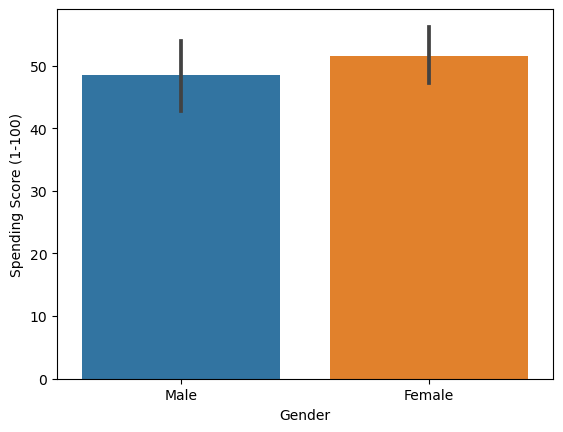

In [8]:
#Generamos un grafico de barras para analizar los datos
sns.barplot(data = Mall_Customers,x='Gender',y='Spending Score (1-100)')

C:\Users\wolfx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wolfx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


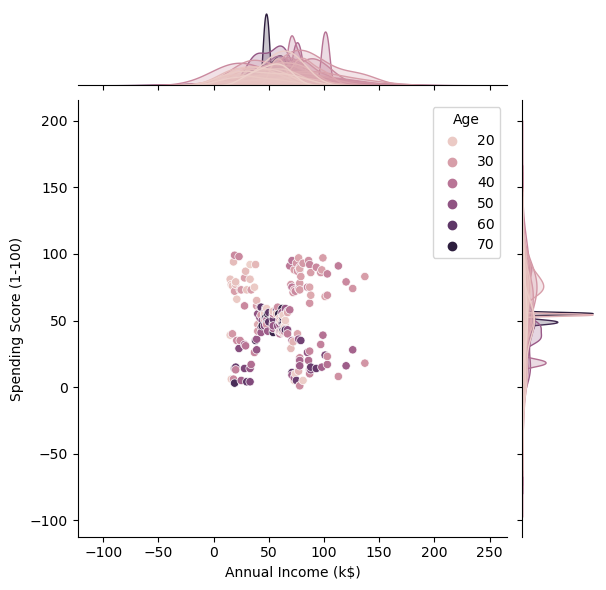

In [9]:
#Generamos un grafico de dispersion para analizar los valores atipicos del dataset
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=Mall_Customers,hue='Age')

Para llevar a cabo el analisis jerarquico extraemos primero los datos

In [10]:
Datos = Mall_Customers.iloc[:, [0,1,2,3,4]].values #Generamos un array en el cual organizamos los datos extraidos en las 5 columnas
Datos

array([[1, 'Male', 19, 15, 39],
       [2, 'Male', 21, 15, 81],
       [3, 'Female', 20, 16, 6],
       [4, 'Female', 23, 16, 77],
       [5, 'Female', 31, 17, 40],
       [6, 'Female', 22, 17, 76],
       [7, 'Female', 35, 18, 6],
       [8, 'Female', 23, 18, 94],
       [9, 'Male', 64, 19, 3],
       [10, 'Female', 30, 19, 72],
       [11, 'Male', 67, 19, 14],
       [12, 'Female', 35, 19, 99],
       [13, 'Female', 58, 20, 15],
       [14, 'Female', 24, 20, 77],
       [15, 'Male', 37, 20, 13],
       [16, 'Male', 22, 20, 79],
       [17, 'Female', 35, 21, 35],
       [18, 'Male', 20, 21, 66],
       [19, 'Male', 52, 23, 29],
       [20, 'Female', 35, 23, 98],
       [21, 'Male', 35, 24, 35],
       [22, 'Male', 25, 24, 73],
       [23, 'Female', 46, 25, 5],
       [24, 'Male', 31, 25, 73],
       [25, 'Female', 54, 28, 14],
       [26, 'Male', 29, 28, 82],
       [27, 'Female', 45, 28, 32],
       [28, 'Male', 35, 28, 61],
       [29, 'Female', 40, 29, 31],
       [30, 'Female', 23

In [11]:
#Reemplazamos los datos que son de tipo objeto (Male, Female) por 0 y 1
Mall_Customers['Gender'].replace({'Male':0,'Female':1},inplace=True)
Mall_Customers['Gender'].unique()

array([0, 1], dtype=int64)

In [12]:
#Cambiamos el tipo de dato de la columna Gender de entero a float
Mall_Customers['Gender'].astype(float).dtypes

dtype('float64')

In [13]:
Datos = Mall_Customers.iloc[:, [0,1,2,3,4]].values
Datos

array([[  1,   0,  19,  15,  39],
       [  2,   0,  21,  15,  81],
       [  3,   1,  20,  16,   6],
       [  4,   1,  23,  16,  77],
       [  5,   1,  31,  17,  40],
       [  6,   1,  22,  17,  76],
       [  7,   1,  35,  18,   6],
       [  8,   1,  23,  18,  94],
       [  9,   0,  64,  19,   3],
       [ 10,   1,  30,  19,  72],
       [ 11,   0,  67,  19,  14],
       [ 12,   1,  35,  19,  99],
       [ 13,   1,  58,  20,  15],
       [ 14,   1,  24,  20,  77],
       [ 15,   0,  37,  20,  13],
       [ 16,   0,  22,  20,  79],
       [ 17,   1,  35,  21,  35],
       [ 18,   0,  20,  21,  66],
       [ 19,   0,  52,  23,  29],
       [ 20,   1,  35,  23,  98],
       [ 21,   0,  35,  24,  35],
       [ 22,   0,  25,  24,  73],
       [ 23,   1,  46,  25,   5],
       [ 24,   0,  31,  25,  73],
       [ 25,   1,  54,  28,  14],
       [ 26,   0,  29,  28,  82],
       [ 27,   1,  45,  28,  32],
       [ 28,   0,  35,  28,  61],
       [ 29,   1,  40,  29,  31],
       [ 30,  

**Creamos el Dendrograma del Clustering Jerarquico**

In [14]:
Clustering_Jerarquico = linkage(Datos, 'ward') #La funcion linkage agrupa los datos en base a su similitud, utilizamos el metodo ward para agrupar los clusters

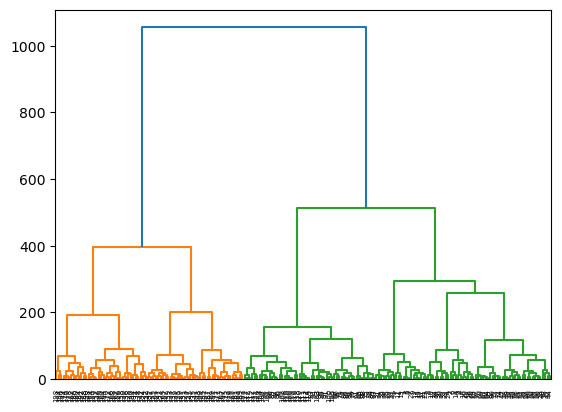

In [15]:
#Realizamos el grafico Jerarquico o Dendrogram
dendrogram=sch.dendrogram(Clustering_Jerarquico)

Creamos los clusters

In [16]:
#Cortamos la altura a la que queremos generar los clusters, en este caso tenemos la altura t=300 en base al Clustering Jerarquico anterior
clusters = fcluster(Clustering_Jerarquico, t=300, criterion='distance') 

In [17]:
clusters

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3,
       3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Agregamos la clasificacion generada en el archivo original csv

In [20]:
Mall_Customers['Cluster'] = clusters
Mall_Customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustering Jerarquico,Cluster
0,1,0,19,15,39,4,4
1,2,0,21,15,81,4,4
2,3,1,20,16,6,4,4
3,4,1,23,16,77,4,4
4,5,1,31,17,40,4,4
...,...,...,...,...,...,...,...
195,196,1,35,120,79,2,2
196,197,1,45,126,28,1,1
197,198,0,32,126,74,2,2
198,199,0,32,137,18,1,1


In [23]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Cluster
Observaciones = len(Mall_Customers)
X = Mall_Customers.drop('Cluster', axis=1)
clusters = Mall_Customers['Cluster']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.39082686868276073 |
| Indice Calinski Harabasz |  240.8181521988132  |
|  Indice Davies Bouldin   | 0.8803166315758896  |
+--------------------------+---------------------+


In [28]:
#Genera un archivo csv con los datos modificados
Mall_Customers.to_csv('Mall_Customers_Hierarchical_Clustering.csv')